<a href="https://colab.research.google.com/github/Jarmos-san/PumpItUp/blob/master/1_Overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [DrivenData Competition | Pump it Up: Data Mining the Water Table](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/)

Using data from Taarifa and the Tanzanian Ministry of Water, can you **predict which pumps are functional**, which **need some repairs**, and which **don't work at all**? This is an intermediate-level practice competition. Predict one of these three classes based on a number of variables about what kind of **pump is operating**, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

---

Goal - ***Predict faulty water pumps.***

[Discussion Forums](https://community.drivendata.org/c/pump-it-up-data-mining-the-water-table)

Problem Description has 3 sections:

- Features
- Labels
- Submission Format

## Features:
|       Column Names       |                 Description                       |
|--------------------------|---------------------------------------------------|
| `amount_tsh`             | **Total static head (amount water available to waterpoint)**                                                                  |
| `date_recorded`          | **The date the row was entered**                  |
| `funder`                 | **Who funded the well**                           |
| `gps_height`             | **Altitude of the well**                          |
| `installer`              | **Organization that installed the well**          |
| `longitude`              | **GPS coordinate**                                |
| `latitude`               | **GPS coordinate**                                |
| `wpt_name`               | **Name of the waterpoint if there is one**        |
| `num_private`            |                                                   |
| `basin`                  | **Geographic water basin**                        |
| `subvillage`             | **Geographic location**                           |
| `region`                 | **Geographic location**                           |
| `region_code`            | **Geographic location (coded)**                   |
| `district_code`          | **Geographic location (coded)**                   |
| `lga`                    | **Geographic location**                           |
| `ward`                   | **Geographic location**                           |
| `population`             | **Population around the well**                    |
| `public_meeting`         | **True/False**                                    |
| `recorded_by`            | **Group entering this row of data**               |
| `scheme_management`      | **Who operates the waterpoint**                   |
| `scheme_name`            | **Who operates the waterpoint**                   |
| `permit`                 | **If the waterpoint is permitted**                |
| `construction_year`      | **Year the waterpoint was constructed**           |
| `extraction_type`        | **The kind of extraction the waterpoint uses**    |
| `extraction_type_group`  | **The kind of extraction the waterpoint uses**    |
| `extraction_type_class`  | **The kind of extraction the waterpoint uses**    |
| `management`             | **How the waterpoint is managed**                 |
| `management_group`       | **How the waterpoint is managed**                 |
| `payment`                | **What the water costs**                          |
| `payment_type`           | **What the water costs**                          |
| `water_quality`          | **The quality of the water**                      |
| `quality_group`          | **The quality of the water**                      |
| `quantity`               | **The quantity of water**                         |
| `quantity_group`         | **The quantity of water**                         |
| `source`                 | **The source of the water**                       |
| `source_type`            | **The source of the water**                       |
| `source_class`           | **The source of the water**                       |
| `waterpoint_type`        | **The kind of waterpoint**                        |
| `waterpoint_type_group`  | **The kind of waterpoint**                        |

## Labels:

- `functional` - **the waterpoint is operational and there are no repairs needed**
- `functional needs repair` - **the waterpoint is operational, but needs repairs**
- `non functional` - **the waterpoint is not operational**

## Submission Format:

id 	  | status_group |
------|--------------|
50785 |	functional   |
51630 |	functional   |
17168 |	functional   |
45559 |	functional   |
49871 |	functional   |

## Data Download:

File 	                                                                                                            | Description                                       |
------------------------------------------------------------------------------------------------------------------|---------------------------------------------------|
[Submission format](https://s3.amazonaws.com/drivendata/data/7/public/SubmissionFormat.csv)                       |	The format for submitting your predictions        |
[Test Set Values](https://s3.amazonaws.com/drivendata/data/7/public/702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv)     |	The independent variables that need predictions   |
[Training Set Labels](https://s3.amazonaws.com/drivendata/data/7/public/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv) |	The dependent variable (status_group) for each of the rows in Training set values   |
[Training Set Values](https://s3.amazonaws.com/drivendata/data/7/public/4910797b-ee55-40a7-8668-10efd5c1b960.csv) | The independent variables for the training set    |

## Setting up Notebook

- **Pandas** *v0.25.3*
- **Numpy** *v1.17.5*
- **Missingno** *v0.4.2*
- **Seaborn** *v0.10.0*

In [101]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd /content/gdrive/My\ Drive/PumpItUp/data

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/PumpItUp/data


In [102]:
# Loading necessary libraries
import os
import pandas as pd
import missingno
import seaborn as sns

# Checking the version for easier debugging at some point of time.
# print(f'Python v{python3.__version__}')
print(f'Pandas v{pd.__version__}')
print(f'Missingno v{missingno.__version__}')
print(f'Missingno v{sns.__version__}')

Pandas v0.25.3
Missingno v0.4.2
Missingno v0.10.0


# Dataset Overview

In [0]:
PATH = 'https://s3.amazonaws.com/drivendata/data/7/public/'

# Submission Format
SubmissionFormat = pd.read_csv(f'{PATH}SubmissionFormat.csv')

# Test set
TestSet = pd.read_csv(f'{PATH}702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv')

# Training set & label set
TrainLabels = pd.read_csv(f'{PATH}0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')
TrainSet = pd.read_csv(f'{PATH}4910797b-ee55-40a7-8668-10efd5c1b960.csv')

# Make a copy of the original files for processing
TrainData = TrainSet.copy()
TestData = TestSet.copy()

In [104]:
# This is how the Submission File be like
SubmissionFormat.head(3)

,id,status_group
0,50785,predicted label
1,51630,predicted label
2,17168,predicted label


In [105]:
# Taking a look at the Training Labels file
TrainLabels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [106]:
# Test & Training set shape
TrainNRow, TrainNCol = TrainData.shape
TestNRow, TestNCol = TestData.shape

print(f'Training set has {TrainNRow} rows & {TrainNCol} columns')
print(f'Test set has {TestNRow} rows & {TestNCol} columns')

Training set has 59400 rows & 40 columns
Test set has 14850 rows & 40 columns


In [107]:
# First 3 rows of the Tranining set
TrainData.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe


In [108]:
# First 3 rows of the Testing set
TestData.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other


In [109]:
# Checking the Training set column names
TrainData.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [110]:
# Check Training set datatypes
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

# Checking for Missing Values

In [0]:
def checkNullValues(data):
    """
    Function to check for missing values
    
    Arguments
    --------
    data: Accepts a dataset

    Returns
    -------
    A list of dicts with variable names as index and the respective values as 
    the percentage of missing value in that column. Besides a Missingno Matrix
    graph is also returned.
    """

    print('Number of Missing Values are:')

    nullValue = data.isnull().sum()     # Sum of all missing value in a column
    nRows = data.shape[0]               # Total number of rows in the dataset
    
    for index, value in nullValue.items():
        if value != 0:
            print(f'{index}: {value}({round(value/nRows*100)})%')

    print('\nVisualization of the Number of Missing Values')
    missingno.matrix(data, figsize=(18,5))

Number of Missing Values are:
funder: 3635(6)%
installer: 3655(6)%
subvillage: 371(1)%
public_meeting: 3334(6)%
scheme_management: 3877(7)%
scheme_name: 28166(47)%
permit: 3056(5)%

Visualization of the Number of Missing Values


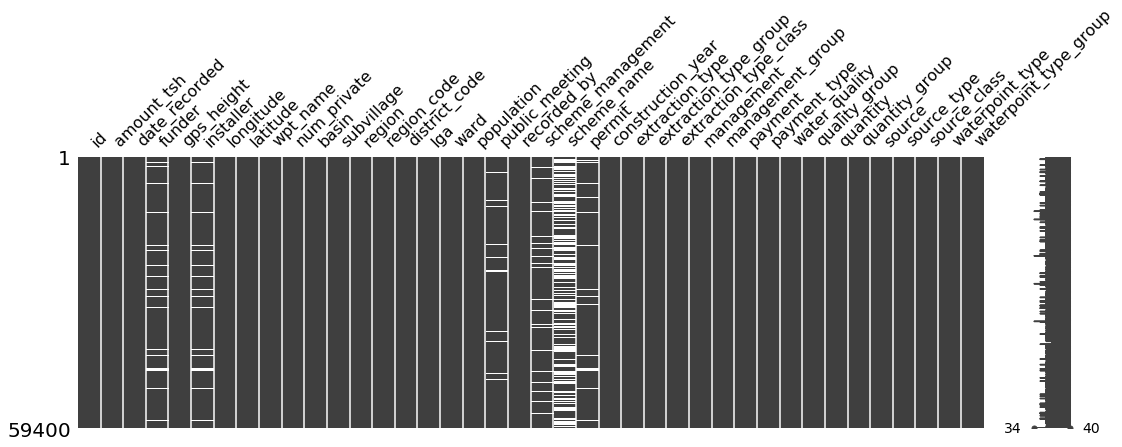

In [112]:
# Missing values from the Training set
checkNullValues(TrainData)

Number of Missing Values are:
funder: 869(6)%
installer: 877(6)%
subvillage: 99(1)%
public_meeting: 821(6)%
scheme_management: 969(7)%
scheme_name: 7092(48)%
permit: 737(5)%

Visualization of the Number of Missing Values


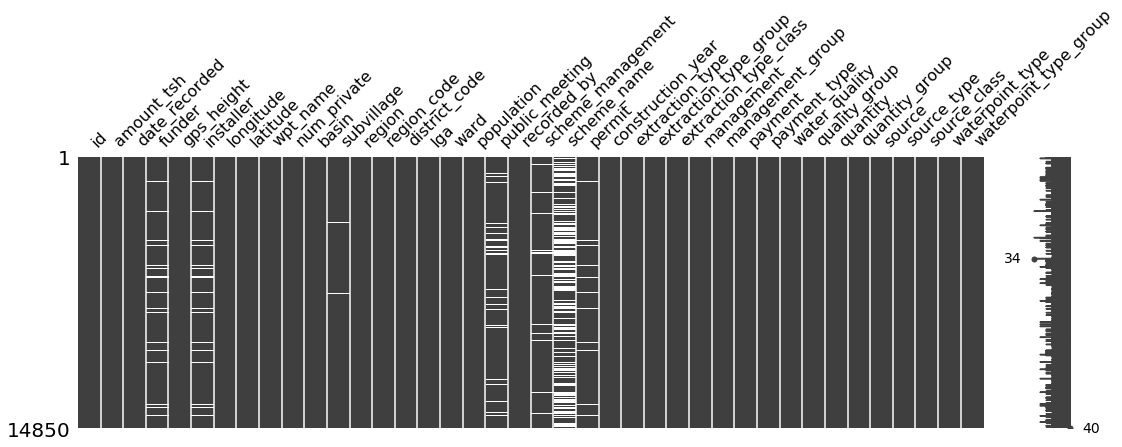

In [113]:
# Missing Values from the Testing set
checkNullValues(TestData)

# Processing the Datasets for Analysis

In [0]:
TrainData = TrainLabels.merge(TrainData, on='id')

In [0]:
# Rename column for the Train set
trainColumns = [
    'ID', 'StatusGroup', 'TSHAmount', 'DateRecorded', 'Funder', 'GPSHeight', 
    'Installer', 'Longitutde', 'Latitude', 'WaterPointName', 'PrivateNum', 'Basin', 
    'SubVillage', 'Region', 'RegionCode','DistrictCode', 'LocalGovernmentArea',
    'Ward', 'Population', 'PublicMeeting', 'RecordedBy', 'SchemeManagement',
    'SchemeName', 'Permit', 'ConstructionYear', 'ExtractionType', 
    'ExtractionTypeGroup', 'ExtractionTypeClass', 'Management', 'ManagementGroup',
    'Payment', 'PaymentType', 'WaterQuality', 'QualityGroup', 'Quantity',
     'QuantityGroup','Source', 'SourceType', 'SourceClass', 'WaterPointType', 
     'WaterPointTypeGroup'
]

# Rename columns for the Test set
testColumns = [
    'ID', 'TSHAmount', 'DateRecorded', 'Funder', 'GPSHeight', 
    'Installer', 'Longitutde', 'Latitude', 'WaterPointName', 'PrivateNum', 'Basin', 
    'SubVillage', 'Region', 'RegionCode','DistrictCode', 'LocalGovernmentArea',
    'Ward', 'Population', 'PublicMeeting', 'RecordedBy', 'SchemeManagement',
    'SchemeName', 'Permit', 'ConstructionYear', 'ExtractionType', 
    'ExtractionTypeGroup', 'ExtractionTypeClass', 'Management', 'ManagementGroup',
    'Payment', 'PaymentType', 'WaterQuality', 'QualityGroup', 'Quantity',
     'QuantityGroup','Source', 'SourceType', 'SourceClass', 'WaterPointType', 
     'WaterPointTypeGroup'
]

TrainData.set_axis(trainColumns, axis=1, inplace=True)
TestData.set_axis(testColumns, axis=1, inplace=True)

# Inferential Statistics

In [129]:
# Statistical inference of numerical values in the dataset
TrainData.describe()

,ID,TSHAmount,GPSHeight,Longitutde,Latitude,PrivateNum,RegionCode,DistrictCode,Population,ConstructionYear
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [130]:
# Statistical inference of the categorical values in the dataset
TrainData.describe(include='O')

,StatusGroup,DateRecorded,Funder,Installer,WaterPointName,Basin,SubVillage,Region,LocalGovernmentArea,Ward,PublicMeeting,RecordedBy,SchemeManagement,SchemeName,Permit,ExtractionType,ExtractionTypeGroup,ExtractionTypeClass,Management,ManagementGroup,Payment,PaymentType,WaterQuality,QualityGroup,Quantity,QuantityGroup,Source,SourceType,SourceClass,WaterPointType,WaterPointTypeGroup
count,59400,59400,55765,55745,59400,59400,59029,59400,59400,59400,56066,59400,55523,31234,56344,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,3,356,1897,2145,37400,9,19287,21,125,2092,2,1,12,2696,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,functional,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,32259,572,9084,17402,3563,10248,508,5294,2503,307,51011,59400,36793,682,38852,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


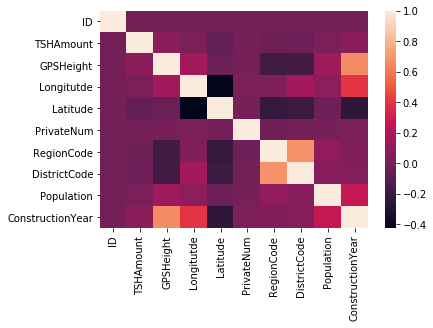

In [131]:
# Correlation among the variables
sns.heatmap(TrainData.corr())

In [132]:

# Double checking column names and everything else
TrainData.head(1)

,ID,StatusGroup,TSHAmount,DateRecorded,Funder,GPSHeight,Installer,Longitutde,Latitude,WaterPointName,PrivateNum,Basin,SubVillage,Region,RegionCode,DistrictCode,LocalGovernmentArea,Ward,Population,PublicMeeting,RecordedBy,SchemeManagement,SchemeName,Permit,ConstructionYear,ExtractionType,ExtractionTypeGroup,ExtractionTypeClass,Management,ManagementGroup,Payment,PaymentType,WaterQuality,QualityGroup,Quantity,QuantityGroup,Source,SourceType,SourceClass,WaterPointType,WaterPointTypeGroup
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [136]:
TestData.head(1)

,ID,TSHAmount,DateRecorded,Funder,GPSHeight,Installer,Longitutde,Latitude,WaterPointName,PrivateNum,Basin,SubVillage,Region,RegionCode,DistrictCode,LocalGovernmentArea,Ward,Population,PublicMeeting,RecordedBy,SchemeManagement,SchemeName,Permit,ConstructionYear,ExtractionType,ExtractionTypeGroup,ExtractionTypeClass,Management,ManagementGroup,Payment,PaymentType,WaterQuality,QualityGroup,Quantity,QuantityGroup,Source,SourceType,SourceClass,WaterPointType,WaterPointTypeGroup
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other


# Saving DataFrame to `.csv`

In [0]:
FILEPATH = '/content/gdrive/My Drive/PumpItUp/data/'

# saving DataFrame to .csv file in GDrive
TrainData.to_csv(f'{FILEPATH}TrainData.csv', index=False)
TestData.to_csv(f'{FILEPATH}TestData.csv', index=False)

# Some Observations About the Data Set

- `SchemeName` has the highest number of missing values with ~47%, from both the Training as well as the Test set.
- The `DateRecorded` is a `datetime` object so it should be possible to do some Time-Series analysis on it but not sure of the information gain from it, since its safe to assume that the column is a record of the date when the information from a particular was collected.
- A lot of the columns has string-type objects, not sure if there're any algorithms that would accept those objects for predictions.
- Some of those columns has possible categorical variables. One Examples is the `WaterPointType` which has 7 unique values.
- Some of the columns are possible duplicates to each other with some trivial difference in the values which could be informative at some point of time.
